# <center> ANOVA Tests </center>

Josh Johnson
12/20/22


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats



In [2]:
url = 'https://docs.google.com/spreadsheets/d/1DW-2yHUm0YhH01r_kNp9ir5CaAlo9s48dhpIx-6J-TM/gviz/tq?tqx=out:csv&sheet=Diets'
df = pd.read_csv(url)
df.head()


,gender,Age,Height,pre.weight,Diet,weight6weeks,kg_lost
0,0,22,159,58,1,54.2,3.8
1,0,46,192,60,1,54.0,6.0
2,0,55,170,64,1,63.3,0.7
3,0,33,171,64,1,61.1,2.9
4,0,50,170,65,1,62.2,2.8


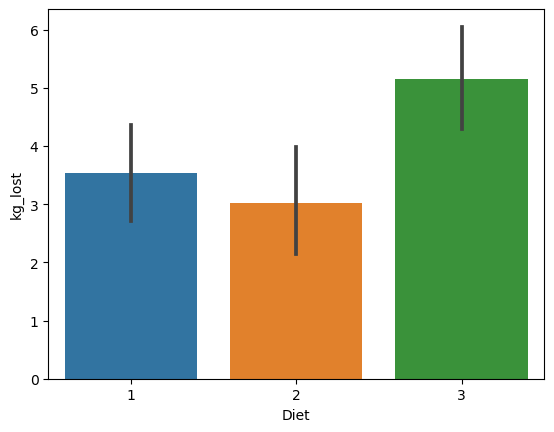

In [3]:
sns.barplot(data=df, x='Diet',y='kg_lost');



In [4]:
## Create groups dictionary. There are only 3 groups, but this is even more helpful when there are many groups
groups = {}
## Loop through all unique categories
for i in df['Diet'].unique():
    ## Get series for group and rename
    data = df.loc[df['Diet']==i,'kg_lost'].copy()
    
    # save into the dictionary
    groups[i] = data
groups.keys()



dict_keys([1, 2, 3])

In [8]:
type(groups[1])

pandas.core.series.Series

In [9]:
## Running normal test on each group and confirming there are >20 in each group
norm_results = {}
for i, data in groups.items():
    stat, p = stats.normaltest(data)
    ## save the p val, test statistic, and the size of the group
    norm_results[i] = {'n': len(data),
                             'p':p,
                             'test stat':stat,}
## convert to a dataframe
norm_results_df = pd.DataFrame(norm_results).T
norm_results_df


,n,p,test stat
1,26.0,0.216027,3.064706
2,27.0,0.841993,0.343967
3,27.0,0.463144,1.539436


In [10]:
### checking sig with pandas 
norm_results_df['sig'] = norm_results_df['p'] < .05 
norm_results_df



,n,p,test stat,sig
1,26.0,0.216027,3.064706,False
2,27.0,0.841993,0.343967,False
3,27.0,0.463144,1.539436,False


In [11]:
# not using * operator, entering each group manually
stats.levene(groups[1],
            groups[2],
            groups[3])



LeveneResult(statistic=0.30650755802082735, pvalue=0.7369067613743494)

In [12]:
# with the * operator 
stats.levene(*groups.values())


LeveneResult(statistic=0.30650755802082735, pvalue=0.7369067613743494)

In [16]:
# perform the correct hypothesis test
# note again the use of the * operator for convenience
result = stats.f_oneway( *groups.values())
result



F_onewayResult(statistic=5.679765022955312, pvalue=0.005001924377430895)

In [17]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
## save the values as kg_lost and the labels to the Diet
values = df['kg_lost']
labels = df['Diet']



In [18]:
values

0     3.8
1     6.0
2     0.7
3     2.9
4     2.8
     ... 
75    5.3
76    9.2
77    6.1
78    6.5
79    6.3
Name: kg_lost, Length: 80, dtype: float64

In [19]:
labels

0     1
1     1
2     1
3     1
4     1
     ..
75    3
76    3
77    3
78    1
79    1
Name: Diet, Length: 80, dtype: int64

In [20]:
## perform tukey's multiple comparison test and display the summary
tukeys_results = pairwise_tukeyhsd(values,labels)
tukeys_results.summary()



group1,group2,meandiff,p-adj,lower,upper,reject
1,2,-0.5125,0.7204,-2.0964,1.0713,False
1,3,1.6097,0.0455,0.0259,3.1935,True
2,3,2.1222,0.0051,0.5534,3.691,True
